## Plotting DLWP predictions with Basemap

DLWP outputs predictions on a lat-lon grid, which can be easily plotted using different projections on the sphere with Basemap. The installation of Basemap and matplotlib is not very robust. An approach that worked for me using a conda virtual environment was:

- pip install -U matplotlib==3.2
- conda install -c conda-forge basemap

In [16]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
os.chdir(os.pardir)
from DLWP.plot import plot_basemap

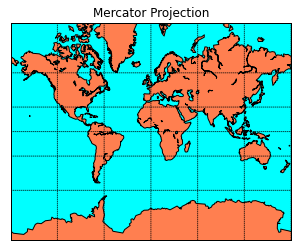

In [10]:
# Example plot with Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

Now load a prediction from DLWP and plot it. DLWP predictions are stored in netCDF files. The output tensor has 5 coordinates: longitude, latitude, starting time of prediction, forecast hour relative to starting time, and variable/level.

In [22]:
data_dir = '/usr/local/google/ilopezgp/ERA5_data_dlwp'
prediction_path = os.path.join(data_dir, 'forecast_dlwp-cs_tutorial.nc')
ds = nc.Dataset(prediction_path)
print(ds)
print(np.shape(ds['forecast'][:]) ) # f_hour, time, varlev, lat, lon in that order

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lat(91), lon(180), f_hour(20), time(105), varlev(1)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 f_hour(f_hour), float32 time(time), float32 forecast(f_hour,time,varlev,lat,lon)
    groups: 
(20, 105, 1, 91, 180)


/usr/local/google/home/ilopezgp/anaconda3/envs/dlwp2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


/usr/local/google/home/ilopezgp/anaconda3/envs/dlwp2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/google/home/ilopezgp/anaconda3/envs/dlwp2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(180,) (91,) (91, 180)


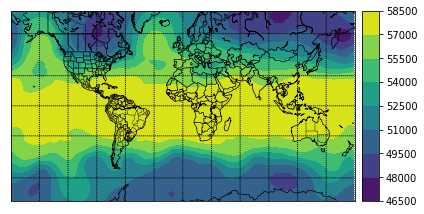

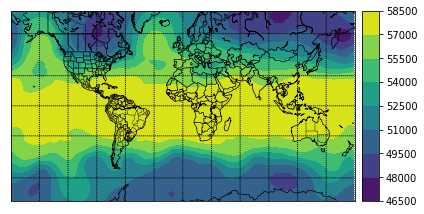

In [34]:
lon_ = ds['lon'][:]
lat_ = ds['lat'][:]
lon2d, lat2d = np.meshgrid(lon_, lat_)
forecast = ds['forecast'][0, 0, 0, :, :]
print(np.shape(lon_), np.shape(lat_), np.shape(forecast))

img_path = os.path.join(data_dir, 'prediction_example.pdf')
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
plot_basemap(m, lon2d, lat2d, forecast, save_file = img_path )

Try different projections and different times/forecast hours...

/usr/local/google/home/ilopezgp/anaconda3/envs/dlwp2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


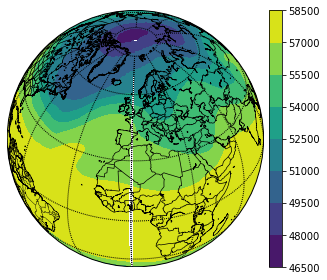

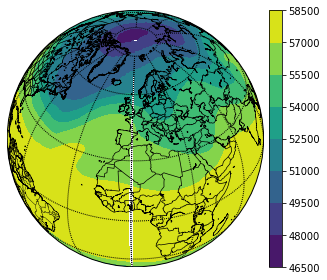

In [39]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
forecast = ds['forecast'][10, 10, 0, :, :]
m = Basemap(projection='ortho',lon_0=2,lat_0=40,resolution='l')
plot_basemap(m, lon2d, lat2d, forecast)